In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import random
import cv2
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        # Necessary imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [ ]:
# Download the kaggle API key
!pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset -p /content/sample_data/ --unzip

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


<ipython-input-8-4ae904aec68d>:14: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ds = pd.Series([len(data[k]) for k in data.keys()], index = data.keys())


<Axes: title={'center': 'Data Balance'}>

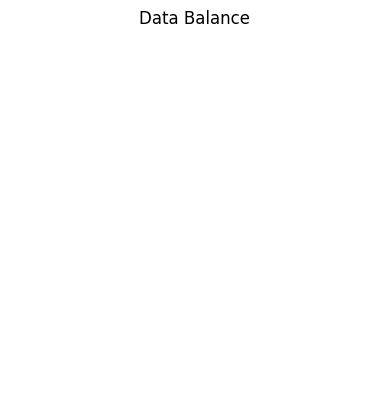

In [ ]:
data = {}
# for root, _, filenames in os.walk('/kaggle/input/brain-tumor-mri-dataset/Training'):
for root, _, filenames in os.walk('sample_data/Training'):
    dirname = root.split('/')[-1]

    for filename in filenames:

        if dirname not in data.keys():
            data[dirname] = []

        data[dirname].append(os.path.join(root, filename))

#Drawing an pie plot for data balance
ds = pd.Series([len(data[k]) for k in data.keys()], index = data.keys())
ds.plot(title='Data Balance', kind='pie', autopct='%1.0f%%')

In [ ]:

plt.figure(figsize=(30, 20))

samples = []
for i, k in enumerate(data.keys()):
    s = cv2.imread(random.choice(data[k]))
    s = cv2.cvtColor(s, cv2.COLOR_BGR2GRAY)
    samples.append(s)

    plt.subplot(1, 4, i + 1)
    plt.imshow(samples[-1], cmap='gray')
    plt.title(k + ' sample')
    plt.xticks([])
    plt.yticks([])

<Figure size 3000x2000 with 0 Axes>

In [ ]:
plt.figure(figsize=(30, 5))

for i, s in enumerate(samples):
    plt.subplot(1, 4, i + 1)
    plt.hist(s.ravel(),256,[0,256])
    plt.title(list(data.keys())[i] + ' sample')

<Figure size 3000x500 with 0 Axes>

In [ ]:


plt.figure(figsize=(30, 20))

for i, s in enumerate(samples):
    s = cv2.Canny(s, threshold1=140, threshold2=210)

    plt.subplot(1, 4, i + 1)
    plt.imshow(s, cmap='gray')
    plt.title(list(data.keys())[i] + ' sample')
    plt.xticks([])
    plt.yticks([])



<Figure size 3000x2000 with 0 Axes>

In [ ]:

plt.figure(figsize=(30, 40))

j = 0
for i, s in enumerate(samples):
    sobelx = cv2.Sobel(s, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(s, cv2.CV_64F, 0, 1, ksize=5)
    laplacian = cv2.Laplacian(s, cv2.CV_64F)
    blended = cv2.addWeighted(src1=sobelx, alpha=0.5, src2=sobely, beta=0.5,gamma=0)

    plt.subplot(4, 4, i + j + 1)
    plt.imshow(sobelx, cmap='gray')
    plt.title(list(data.keys())[i] + ' sample sobelx')
    plt.xticks([])
    plt.yticks([])

    plt.subplot(4, 4, i + j + 2)
    plt.imshow(sobely, cmap='gray')
    plt.title(list(data.keys())[i] + ' sample sobely')
    plt.xticks([])
    plt.yticks([])

    plt.subplot(4, 4, i + j + 3)
    plt.imshow(laplacian, cmap='gray')
    plt.title(list(data.keys())[i] + ' sample laplacian')
    plt.xticks([])
    plt.yticks([])

    plt.subplot(4, 4, i + j + 4)
    plt.imshow(blended, cmap='gray')
    plt.title(list(data.keys())[i] + ' sample blended')
    plt.xticks([])
    plt.yticks([])

    j += 3



<Figure size 3000x4000 with 0 Axes>

In [ ]:
model5 = Sequential()


# change activation function: very important


# Convolutional layer 1
model5.add(Conv2D(64,(7,7), input_shape=(200, 200, 1), padding='same', activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2,2)))

#Convolutional layer 2
model5.add(Conv2D(128,(7,7), padding='same', activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 3
model5.add(Conv2D(128,(7,7), padding='same', activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 4
model5.add(Conv2D(256,(7,7), padding='same', activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2,2)))

 # Convolutional layer 5
model5.add(Conv2D(256,(7,7), padding='same', activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 6
model5.add(Conv2D(512,(7,7), padding='same', activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2,2)))

model5.add(Flatten())

# Full connect layers

model5.add(Dense(units= 1024, activation='relu'))
model5.add(Dropout(0.25))
model5.add(Dense(units=512, activation='relu'))  #change dense (increase, leads to stronger model) + dropout
model5.add(Dropout(0.25))
model5.add(Dense(units=4, activation='softmax')) #softmax, relu --> activation functions that will change accuracy
model5.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy', #standard deviation --> epochs vs loss vs time
                   metrics= ['categorical_accuracy'])

In [ ]:
generator_train = ImageDataGenerator(rescale=1./255,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)

generator_test = ImageDataGenerator(rescale=1./255,
                                   featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False) #normalization: horizontal flip of each image

train = generator_train.flow_from_directory('sample_data/Training', target_size=(200, 200),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

test = generator_test.flow_from_directory('sample_data/Testing', target_size=(200, 200),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

FileNotFoundError: ignored

In [ ]:
model5_es = EarlyStopping(monitor = 'loss', min_delta = 1e-11, patience = 12, verbose = 1)
model5_rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 6, verbose = 1)
model5_mcp = ModelCheckpoint(filepath = 'model5_weights.h5', monitor = 'val_categorical_accuracy',
                      save_best_only = True, verbose = 1)

In [ ]:

history5 = model5.fit(train, steps_per_epoch=5712//32, epochs=25, validation_data=test, validation_steps= 1311//32,
                     callbacks=[model5_es, model5_rlr, model5_mcp])



NameError: ignored

In [ ]:
import pandas as pd
history_frame = pd.DataFrame(history5.history)
history_frame.loc[:, ['loss','val_loss']].plot()
history_frame.loc[:, ['categorical_accuracy','val_categorical_accuracy']].plot();



# get outputs in confusion matrix to evaluate
# powerpoint, define libraries + functions

NameError: ignored

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [ ]:
# Predict labels for the test set
y_pred = np.argmax(model5.predict(test), axis=-1)

# Get the true labels for the test set
y_true = test.classes

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Define class names
class_names = ['glioma', 'meningioma', 'no_tumor', 'pituitary']

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Add labels and title
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

NameError: ignored